<a href="https://colab.research.google.com/github/Abdul-ur-Rehman-Butt/2022-SE-27_LAB_TASKS_ML/blob/main/lab_6__2022_SE_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
trip_data = pd.read_csv('/content/taxi_trip_pricing.csv')
trip_data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [ ]:
len(trip_data)

1000

In [ ]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [ ]:
trip_data.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [ ]:
# identify the numerical columns and replace the missing values with their median.

num_col = ['Trip_Distance_km','Passenger_Count','Base_Fare','Per_Km_Rate','Per_Minute_Rate','Trip_Duration_Minutes','Trip_Price']
trip_data[num_col] = trip_data[num_col].apply(lambda col: col.fillna(col.median()))

In [ ]:
# identify the catagorical columns and replace the missing values with their mode.
# [0] means that we are taking the first mode from the data

cat_col = ['Time_of_Day','Day_of_Week','Traffic_Conditions','Weather' ]
trip_data[cat_col] = trip_data[cat_col].apply(lambda col: col.fillna(col.mode()[0]))

In [ ]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       1000 non-null   float64
 1   Time_of_Day            1000 non-null   object 
 2   Day_of_Week            1000 non-null   object 
 3   Passenger_Count        1000 non-null   float64
 4   Traffic_Conditions     1000 non-null   object 
 5   Weather                1000 non-null   object 
 6   Base_Fare              1000 non-null   float64
 7   Per_Km_Rate            1000 non-null   float64
 8   Per_Minute_Rate        1000 non-null   float64
 9   Trip_Duration_Minutes  1000 non-null   float64
 10  Trip_Price             1000 non-null   float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [ ]:
# removing the outlier of "Trip_Distance_km"

col = 'Trip_Distance_km'
Q1 = trip_data[col].quantile(0.25)
Q3 = trip_data[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
non_outliers = trip_data[(trip_data[col] >= lower_bound) & (trip_data[col] <= upper_bound)][col]
rep_value = non_outliers.mean()
trip_data[col] = trip_data[col].where((trip_data[col] >= lower_bound) & (trip_data[col] <= upper_bound), rep_value)

In [ ]:
# removing the outlier of "Trip_Price"

col = 'Trip_Price'
Q1 = trip_data[col].quantile(0.25)
Q3 = trip_data[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
non_outliers = trip_data[(trip_data[col] >= lower_bound) & (trip_data[col] <= upper_bound)][col]
rep_value = non_outliers.mean()
trip_data[col] = trip_data[col].where((trip_data[col] >= lower_bound) & (trip_data[col] <= upper_bound), rep_value)

In [ ]:

# Linear Regression for multiple variables


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn import preprocessing
my_label = preprocessing.LabelEncoder()

In [ ]:
trip_data[ 'Time_of_Day' ]= my_label.fit_transform(trip_data[ 'Time_of_Day' ])
trip_data[ 'Day_of_Week' ]= my_label.fit_transform(trip_data[ 'Day_of_Week' ])
trip_data[ 'Traffic_Conditions' ]= my_label.fit_transform(trip_data[ 'Traffic_Conditions' ])
trip_data[ 'Weather' ]= my_label.fit_transform(trip_data[ 'Weather' ])

In [ ]:
(trip_data[['Time_of_Day', 'Day_of_Week','Traffic_Conditions','Weather']]).head()

,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather
0,2,0,1,0
1,0,0,0,0
2,1,1,0,0
3,1,0,1,0
4,1,0,0,0


In [ ]:
trip_data.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

<Axes: xlabel='Trip_Distance_km', ylabel='Density'>

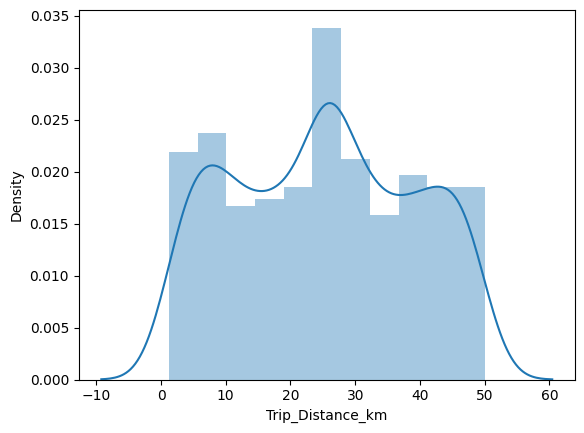

In [ ]:
sns.distplot(trip_data['Trip_Distance_km'])

<Axes: xlabel='Passenger_Count', ylabel='Density'>

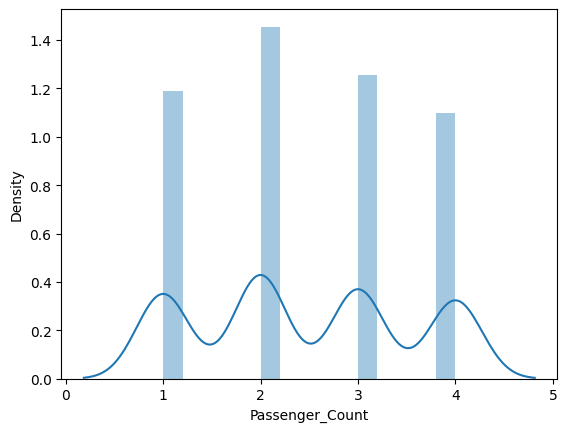

In [ ]:
sns.distplot(trip_data['Passenger_Count'])

<Axes: xlabel='Trip_Price', ylabel='Density'>

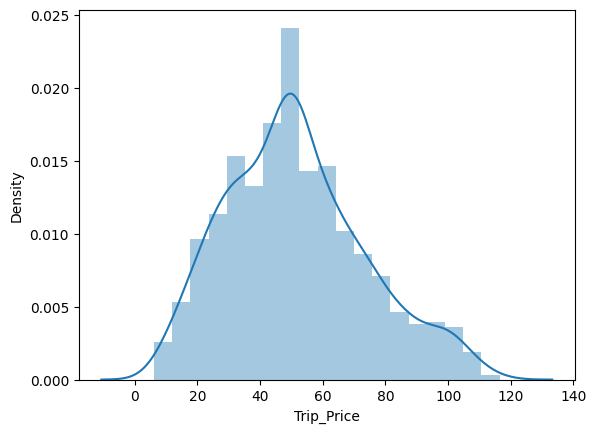

In [ ]:
sns.distplot(trip_data['Trip_Price'])

<Axes: xlabel='Time_of_Day', ylabel='Density'>

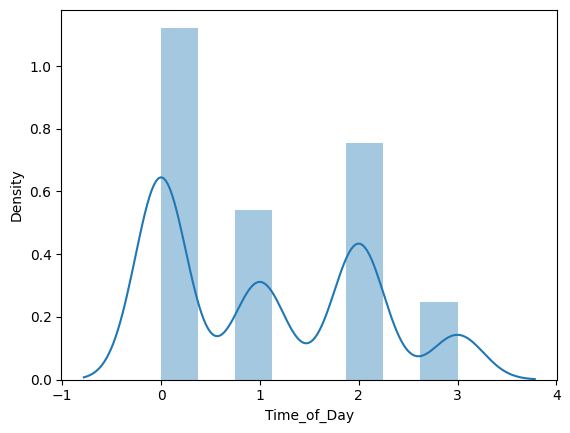

In [ ]:
sns.distplot(trip_data['Time_of_Day'])

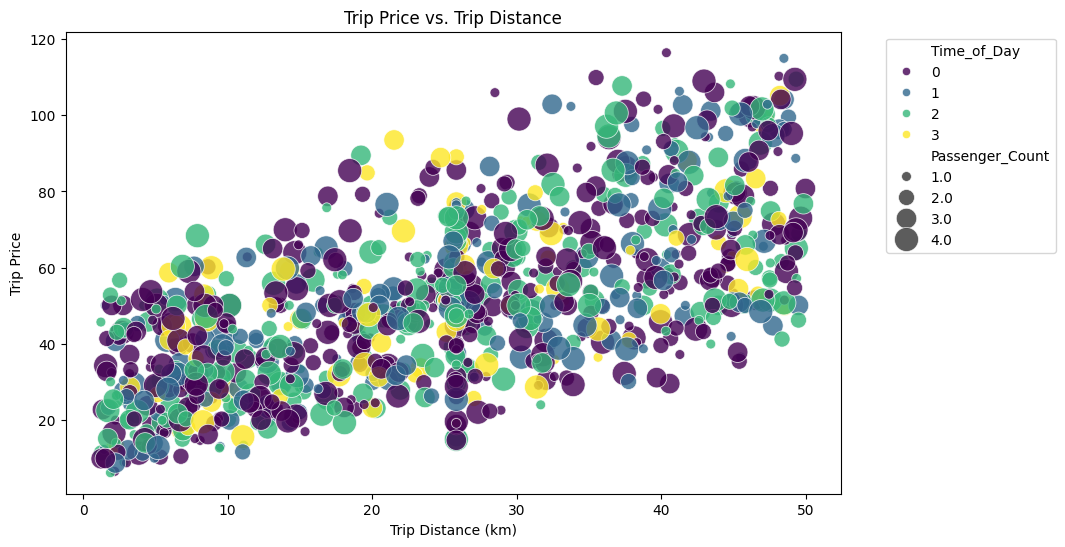

In [ ]:
trip_data = pd.DataFrame(trip_data)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Trip_Distance_km',
    y='Trip_Price',
    data=trip_data,
    hue='Time_of_Day',          # Represents Time_of_Day with color
    size='Passenger_Count',       # Represents Passenger_Count with size

    palette='viridis',            # Color palette for hue
    sizes=(50, 300),              # Range for size scale
    alpha=0.8                     # Transparency
)

plt.title('Trip Price vs. Trip Distance')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Trip Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()


In [ ]:
trip_data[['Trip_Distance_km', 'Passenger_Count', 'Base_Fare','Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']].corr()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
Trip_Distance_km,1.000000,-0.013898,0.045475,-0.037588,-0.013606,-0.037873,0.654319
Passenger_Count,-0.013898,1.000000,0.019717,0.025258,0.028360,0.024868,0.040417
Base_Fare,0.045475,0.019717,1.000000,0.002975,-0.018047,0.011585,0.036404
Per_Km_Rate,-0.037588,0.025258,0.002975,1.000000,0.027585,0.025636,0.377119
Per_Minute_Rate,-0.013606,0.028360,-0.018047,0.027585,1.000000,-0.022913,0.247809
Trip_Duration_Minutes,-0.037873,0.024868,0.011585,0.025636,-0.022913,1.000000,0.332502
Trip_Price,0.654319,0.040417,0.036404,0.377119,0.247809,0.332502,1.000000


In [ ]:
X = trip_data[['Trip_Distance_km','Passenger_Count','Time_of_Day']]
Y = trip_data['Trip_Price']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(Y_test,Y_pred)

In [ ]:
mse

284.01136770498323

In [ ]:
np.sqrt(mse)

16.852636817571998

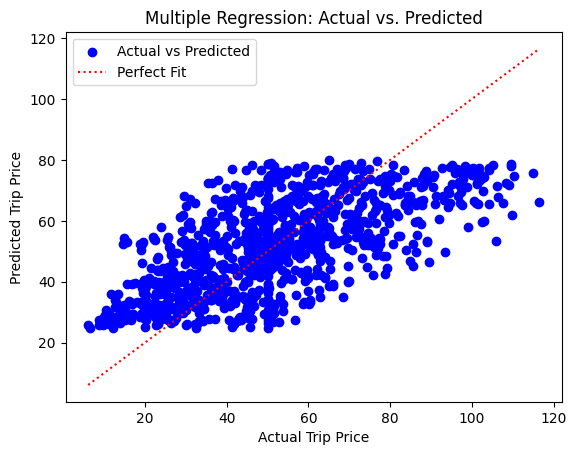

In [ ]:
Y_predict=model.predict(X)
plt.scatter(Y, Y_predict, color='blue', label='Actual vs Predicted')

plt.plot([min(Y), max(Y)], [min(Y), max(Y)], color='red', linestyle='dotted', label='Perfect Fit')

plt.xlabel('Actual Trip Price')
plt.ylabel('Predicted Trip Price')
plt.title('Multiple Regression: Actual vs. Predicted')
plt.legend()
plt.show()